In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Loading The Dataset 

In [2]:
df=pd.read_csv("auto_insurance_sweden.csv")

### Renaming The Column Name

In [3]:
df.rename(columns={"108":"x","392.5":"y"},inplace=True)

In [4]:
df

,x,y
0,19,46.2
1,13,15.7
2,124,422.2
3,40,119.4
4,57,170.9
...,...,...
57,9,87.4
58,31,209.8
59,14,95.5
60,53,244.6


### Dataset Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       62 non-null     int64  
 1   y       62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [6]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Describing Label & Feature 

In [8]:
x=df.x

In [9]:
y=df.y

### Splitting Dataset For Training And Testing

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x1=x_train.to_numpy().reshape(-1,1)
x1

array([[ 10],
       [ 23],
       [ 15],
       [ 13],
       [ 11],
       [  6],
       [ 16],
       [  3],
       [ 30],
       [ 13],
       [ 31],
       [ 61],
       [  0],
       [  9],
       [ 29],
       [ 27],
       [  6],
       [ 41],
       [ 53],
       [  4],
       [ 11],
       [  5],
       [ 48],
       [ 25],
       [ 60],
       [  7],
       [  3],
       [ 22],
       [ 13],
       [  5],
       [ 40],
       [  2],
       [ 41],
       [ 17],
       [  7],
       [ 14],
       [ 19],
       [ 23],
       [  6],
       [  8],
       [ 24],
       [ 29],
       [ 23],
       [ 20],
       [ 13],
       [124],
       [ 37],
       [ 24],
       [ 45]], dtype=int64)

### Creating Linear Regression Model

In [12]:
model=LinearRegression()

In [13]:
result=model.fit(x1,y_train)

In [14]:
result.coef_

array([3.48154259])

In [15]:
result.intercept_

19.2264994345598

### Prediction Of Model Using Testing Dataset

In [16]:
y_predict=result.predict(x_test.to_numpy().reshape(-1,1))

In [17]:
y_predict

array([210.71134175,  61.00501049,  33.15266978,  57.5234679 ,
        47.07884013,  33.15266978,  29.6711272 ,  67.96809566,
        43.59729755,  50.56038272, 217.67442692,  50.56038272,
       109.74660671])

### Accuracy of Model

In [18]:
accuracy=result.score(x_test.to_numpy().reshape(-1,1),y_test)*100

In [19]:
accuracy

70.14891202831063

**Root Mean Square Error**

In [22]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

32.60940935283388


### Result Using Graph

#### Training

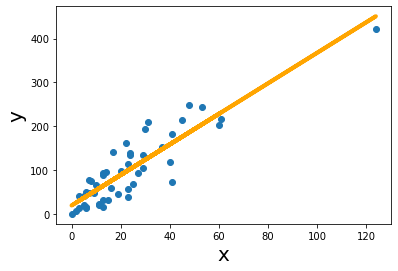

In [29]:
plt.scatter(x_train,y_train)
yhat=result.coef_*x_train.values.reshape(-1,1)+result.intercept_
fig=plt.plot(x_train,yhat,lw=4,c="orange",label="regression line")
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

#### Testing

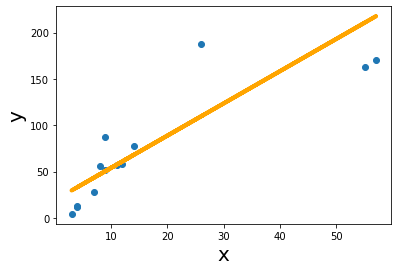

In [35]:
plt.scatter(x_test,y_test)
yhat1=result.coef_*x_test.values.reshape(-1,1)+result.intercept_
fig=plt.plot(x_test,yhat1,lw=4,c="orange",label="regression line")
plt.xlabel("x",fontsize=20,c="black")
plt.ylabel("y",fontsize=20,c="black")
plt.show()